# Figure 3


In [1]:
# Load in packages
library(tidyverse)
library(data.table)
library(readxl)
library(dplyr)
library(stringr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [2]:
#Clear environment: 
rm(list=ls())
setwd("")

# Set your datasets below and read in the files containing all indels ≤ 50bp for each dataset:

In [3]:

## define dfs 
df_name_1 = "gnomAD"
df_name_2 = "IGM"
df_name_3 = "UKBB"

## Read in dataframe (total)
df_1 = fread("gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_lt50bp.csv", header = TRUE )
df_2 = fread("IGM/2023-03-23_IGM_n39367_indelsonly_rAF_lt50bp.csv", header = TRUE )
df_3 = fread("UKBB/UK.BB.exomes.430k.sites_indelsonly_rAF_lt50bp.csv", header = TRUE )


# Read in rAF-hi indels file for each dataset: 

In [4]:
rAF_hi_bp_10_df_1 = fread("gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp10_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_20_df_1 = fread("gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp20_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_30_df_1 = fread("gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp30_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_40_df_1 = fread("gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp40_rAF_hiIndels.lt50bp.csv", header = TRUE)

rAF_hi_bp_10_df_2 = fread("IGM/2023-03-23_IGM_n39367_indelsonly_rAF_bp10_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_20_df_2 = fread("IGM/2023-03-23_IGM_n39367_indelsonly_rAF_bp20_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_30_df_2 = fread("IGM/2023-03-23_IGM_n39367_indelsonly_rAF_bp30_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_40_df_2 = fread("IGM/2023-03-23_IGM_n39367_indelsonly_rAF_bp40_rAF_hiIndels.lt50bp.csv", header = TRUE)

rAF_hi_bp_10_df_3 = fread("UKBB/UK.BB.exomes.430k.sites_indelsonly_rAF_bp10_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_20_df_3 = fread("UKBB/UK.BB.exomes.430k.sites_indelsonly_rAF_bp20_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_30_df_3 = fread("UKBB/UK.BB.exomes.430k.sites_indelsonly_rAF_bp30_rAF_hiIndels.lt50bp.csv", header = TRUE)
rAF_hi_bp_40_df_3 = fread("UKBB/UK.BB.exomes.430k.sites_indelsonly_rAF_bp40_rAF_hiIndels.lt50bp.csv", header = TRUE)


In [5]:
#Declare your bp range:

bp_range = c("10", "20", "30", "40")

In [6]:
#Define your sAF_lo threshold:
sAF_lo = (1 * 10^-4)

# Find the total number of indels that are sAF-lo by sAF 

In [7]:
tot_sAF_lo_sAF_df1 = nrow(df_1 %>% filter(sAF <= sAF_lo))
tot_sAF_lo_sAF_df2 = nrow(df_2 %>% filter(sAF <= sAF_lo))
tot_sAF_lo_sAF_df3 = nrow(df_3 %>% filter(sAF <= sAF_lo))


# Calculate the number and percentages of the sAF_lo sAF indels that are also sAF-lo by rAF for each bp window and also calculate the number and percentages of the sAF-lo sAF indels that are rAF-hi (sAF-hi by rAF for each bp window) 

In [8]:
for (i in bp_range) {
  # call that var
  temp_df_1 = paste0("rAF_hi_bp_", i, "_df_1")
  temp_df_2 = paste0("rAF_hi_bp_", i, "_df_2")
  temp_df_3 = paste0("rAF_hi_bp_", i, "_df_3")
  
  ## calculate the number of rAF_hi indels 
  num_df_1 = paste0("num_rAF_hi_bp_", i , "_df_1")
  assign(num_df_1, nrow(get(temp_df_1)))
  
  num_df_2 = paste0("num_rAF_hi_bp_", i , "_df_2")
  assign(num_df_2, nrow(get(temp_df_2)))
  
  num_df_3 = paste0("num_rAF_hi_bp_", i , "_df_3")
  assign(num_df_3, nrow(get(temp_df_3)))
  
  # get the number of rAF_lo indels 
  rAF_lo_df_1 = paste0("num_rAF_lo_bp_", i , "_df_1")
  assign(rAF_lo_df_1, (tot_sAF_lo_sAF_df1 - nrow(get(temp_df_1))))
  
  rAF_lo_df_2 = paste0("num_rAF_lo_bp_", i , "_df_2")
  assign(rAF_lo_df_2, (tot_sAF_lo_sAF_df2 - nrow(get(temp_df_2))))
  
  
  rAF_lo_df_3 = paste0("num_rAF_lo_bp_", i , "_df_3")
  assign(rAF_lo_df_3, (tot_sAF_lo_sAF_df3 - nrow(get(temp_df_3))))
  
  
  ## calculate the percentage and save in dynamic variable 
  percent_df_1 = paste0("percent_rAF_hi_bp_", i, "_df_1")
  assign(percent_df_1, round(((get(num_df_1) / tot_sAF_lo_sAF_df1) ),2))
  
  percent_df_2 = paste0("percent_rAF_hi_bp_", i, "_df_2")
  assign(percent_df_2, round(((get(num_df_2) / tot_sAF_lo_sAF_df2) ),2))
  
  percent_df_3 = paste0("percent_rAF_hi_bp_", i, "_df_3")
  assign(percent_df_3, round(((get(num_df_3) / tot_sAF_lo_sAF_df3) ),2))
  
  ## find the percentage of the rAF_lo rAF genes 
  percent_diff_df_1 = paste0("percent_rAF_lo_bp_", i, "_df_1")
  assign(percent_diff_df_1, round(((get(rAF_lo_df_1) / tot_sAF_lo_sAF_df1) ),2))
  
  percent_diff_df_2 = paste0("percent_rAF_lo_bp_", i, "_df_2")
  assign(percent_diff_df_2, round(((get(rAF_lo_df_2) / tot_sAF_lo_sAF_df2) ),2))
  
  percent_diff_df_3 = paste0("percent_rAF_lo_bp_", i, "_df_3")
  assign(percent_diff_df_3, round(((get(rAF_lo_df_3) / tot_sAF_lo_sAF_df3) ),2))
}

# Make dataframe for graph 

Saving 7 x 7 in image


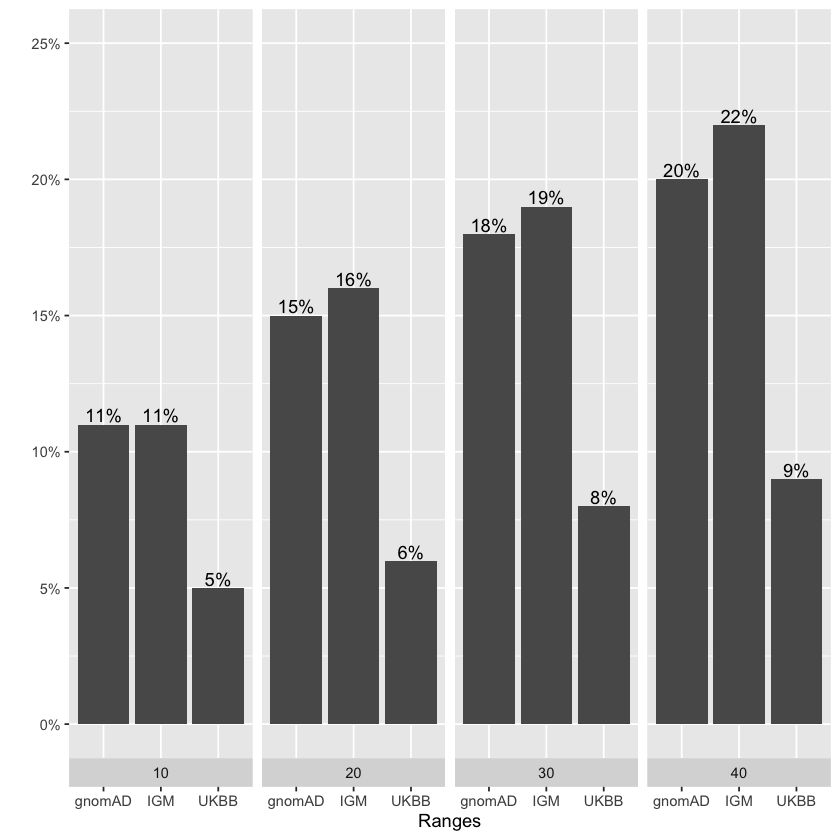

In [9]:
windows = c(rep(bp_range, 6))
condition = c(rep("rAF_hi", 4), rep("rAF_lo", 4), rep("rAF_hi", 4), rep("rAF_lo", 4), rep("rAF_hi", 4), rep("rAF_lo", 4))


num_indels = c(num_rAF_hi_bp_10_df_1, num_rAF_hi_bp_20_df_1, num_rAF_hi_bp_30_df_1, num_rAF_hi_bp_40_df_1, num_rAF_lo_bp_10_df_1, num_rAF_lo_bp_20_df_1, num_rAF_lo_bp_30_df_1, num_rAF_lo_bp_40_df_1, num_rAF_hi_bp_10_df_2, num_rAF_hi_bp_20_df_2, num_rAF_hi_bp_30_df_2, num_rAF_hi_bp_40_df_2, num_rAF_lo_bp_10_df_2, num_rAF_lo_bp_20_df_2, num_rAF_lo_bp_30_df_2, num_rAF_lo_bp_40_df_2, num_rAF_hi_bp_10_df_3, num_rAF_hi_bp_20_df_3, num_rAF_hi_bp_30_df_3, num_rAF_hi_bp_40_df_3, num_rAF_lo_bp_10_df_3, num_rAF_lo_bp_20_df_3, num_rAF_lo_bp_30_df_3, num_rAF_lo_bp_40_df_3)


perct_indels = c(percent_rAF_hi_bp_10_df_1, percent_rAF_hi_bp_20_df_1, percent_rAF_hi_bp_30_df_1, percent_rAF_hi_bp_40_df_1, percent_rAF_lo_bp_10_df_1, percent_rAF_lo_bp_20_df_1, percent_rAF_lo_bp_30_df_1, percent_rAF_lo_bp_40_df_1, percent_rAF_hi_bp_10_df_2, percent_rAF_hi_bp_20_df_2, percent_rAF_hi_bp_30_df_2, percent_rAF_hi_bp_40_df_2, percent_rAF_lo_bp_10_df_2, percent_rAF_lo_bp_20_df_2, percent_rAF_lo_bp_30_df_2, percent_rAF_lo_bp_40_df_2, percent_rAF_hi_bp_10_df_3, percent_rAF_hi_bp_20_df_3, percent_rAF_hi_bp_30_df_3, percent_rAF_hi_bp_40_df_3, percent_rAF_lo_bp_10_df_3, percent_rAF_lo_bp_20_df_3, percent_rAF_lo_bp_30_df_3, percent_rAF_lo_bp_40_df_3 )

df_labels = c(rep(df_name_1, 8), rep(df_name_2, 8),rep(df_name_3, 8))


graph_df = data.frame(windows, condition, num_indels, perct_indels, df_labels)
graph_df$percentage_labels = paste0(graph_df$perct_indels * 100, "%")

#Make graph with only rAF_hi

graph_df = graph_df %>% filter (condition == "rAF_hi")

ggplot(graph_df, aes(x = df_labels, y = perct_indels)) + 
         geom_bar(stat = "identity", position = "stack") + 
         scale_y_continuous(labels = scales::percent_format(scale = 100), limits = c(0 , 0.25)) + 
         facet_grid(~windows, switch = "both")  +  
         theme(legend.position = "top") + 
         labs( y = "", x = "Ranges", fill = "Indel Type") +  
         geom_text(aes(label = percentage_labels), color = "black", vjust = -0.2 ) 

setwd("")
ggsave("fig3.jpg")

In [10]:
for (i in bp_range) {
  num_df1 = paste0("num_rAF_hi_bp_", i , "_df_1")
  num_df2 = paste0("num_rAF_hi_bp_", i , "_df_2")
  num_df3 = paste0("num_rAF_hi_bp_", i , "_df_3")
  
  prct_df1 = paste0("percent_rAF_hi_bp_", i, "_df_1")
  prct_df2 = paste0("percent_rAF_hi_bp_", i, "_df_2")
  prct_df3 = paste0("percent_rAF_hi_bp_", i, "_df_3")
  
  print (paste0("In the dataframe ", df_name_1, " there are ", get(num_df1), " rAF_hi indels in the ",i,"bp sliding window."))
  print (paste0("In the dataframe ", df_name_1, " rAF_hi indels account for ", get(prct_df1), " percent in the ",i,"bp sliding window."))


  print (paste0("In the dataframe ", df_name_2, " there are ", get(num_df2), " rAF_hi indels in the ",i,"bp sliding window."))
  print (paste0("In the dataframe ", df_name_2, " rAF_hi indels account for ", get(prct_df2), " percent in the ",i,"bp sliding window."))
  
  print (paste0("In the dataframe ", df_name_3, " there are ", get(num_df3), " rAF_hi indels in the ",i,"bp sliding window."))
  print (paste0("In the dataframe ", df_name_3, " rAF_hi indels account for ", get(prct_df3), " percent in the ",i,"bp sliding window."))
}

graph_df

[1] "In the dataframe gnomAD there are 101092 rAF_hi indels in the 10bp sliding window."
[1] "In the dataframe gnomAD rAF_hi indels account for 0.11 percent in the 10bp sliding window."
[1] "In the dataframe IGM there are 28436 rAF_hi indels in the 10bp sliding window."
[1] "In the dataframe IGM rAF_hi indels account for 0.11 percent in the 10bp sliding window."
[1] "In the dataframe UKBB there are 18608 rAF_hi indels in the 10bp sliding window."
[1] "In the dataframe UKBB rAF_hi indels account for 0.05 percent in the 10bp sliding window."
[1] "In the dataframe gnomAD there are 135872 rAF_hi indels in the 20bp sliding window."
[1] "In the dataframe gnomAD rAF_hi indels account for 0.15 percent in the 20bp sliding window."
[1] "In the dataframe IGM there are 39329 rAF_hi indels in the 20bp sliding window."
[1] "In the dataframe IGM rAF_hi indels account for 0.16 percent in the 20bp sliding window."
[1] "In the dataframe UKBB there are 24877 rAF_hi indels in the 20bp sliding window."
[1]

windows,condition,num_indels,perct_indels,df_labels,percentage_labels
<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
10,rAF_hi,101092,0.11,gnomAD,11%
20,rAF_hi,135872,0.15,gnomAD,15%
30,rAF_hi,159826,0.18,gnomAD,18%
40,rAF_hi,178872,0.20,gnomAD,20%
10,rAF_hi,28436,0.11,IGM,11%
20,rAF_hi,39329,0.16,IGM,16%
30,rAF_hi,48224,0.19,IGM,19%
40,rAF_hi,55962,0.22,IGM,22%
10,rAF_hi,18608,0.05,UKBB,5%


# A note on annotation

Use VEP to annotate the UK variant vcf file with the gene names.

The code below is a linux command that can be used to get the CHR POS REF ALT SYMBOL columns

gzcat UKBB_Indels_sorted.processed.vep.vcf.gz | bcftools query -f '%CHROM\t%POS\t%REF\t%ALT\t%INFO/CSQ\n' | sed 's/|/\t/g' | cut -f 1,2,3,4,8 > UKBB_annotated_genes.txt

# Find number of genes. 

In [11]:
setwd ("")

sample_name_gene_name_df1 = fread("gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly.vcf_withFirstSYMBOL.txt")   %>% filter(SYMBOL != "")
sample_name_gene_name_df1$VarID = paste0(sample_name_gene_name_df1$CHR, "-" ,sample_name_gene_name_df1$POS, "-", sample_name_gene_name_df1$REF,"-", sample_name_gene_name_df1$ALT)
colnames(sample_name_gene_name_df1) = c("CHR", "POS", "REF", "ALT", "geneName", "VarID")

sample_name_gene_name_df2 = fread("IGM/2023-03-24_11-47-14_IGM_n39367_indels_genotypes_selectcols.csv")  %>% filter(`Sample Name` != "")
colnames(sample_name_gene_name_df2) = c("VarID", "geneName", "sampleName", "coveredCtrl", "AC")

sample_name_gene_name_df3 = fread("UKBB/UKBB_annotated_genes.txt", fill = TRUE) %>% filter(V5 != "")
sample_name_gene_name_df3$VarID = paste0(sample_name_gene_name_df3$V1, "-", sample_name_gene_name_df3$V2, "-", sample_name_gene_name_df3$V3, "-", sample_name_gene_name_df3$V4)
colnames(sample_name_gene_name_df3) = c("CHR", "POS", "REF", "ALT", "geneName", "VarID")

# set bp ranges and variant effects 
bp_range = c("10", "20", "30", "40")

df_name_1="gnomAD"
df_name_2="IGM"
df_name_3="UKBB"


## Suspicious indels were identified in XX genes in the IGM dataset and YY genes in the gnomAD dataset and ZZ genes in the UKBB dataset. 

for (i in bp_range) {
  
  ## get df with sus indels 
  rAF_hi_df_1 = paste0("rAF_hi_bp_", i, "_df_1")
  rAF_hi_df_2 = paste0("rAF_hi_bp_", i, "_df_2")
  rAF_hi_df_3 = paste0("rAF_hi_bp_", i, "_df_3")
  
  ## merge with sample name and gene name 
  df1_with_gene = paste0("df_1_with_gene_bp", i)
  df2_with_gene = paste0("df_2_with_gene_bp", i)
  df3_with_gene = paste0("df_3_with_gene_bp", i)
  
  assign(df1_with_gene, merge(get(rAF_hi_df_1), sample_name_gene_name_df1, by = "VarID"))
  assign(df2_with_gene, merge(get(rAF_hi_df_2), sample_name_gene_name_df2, by = "VarID"))
  assign(df3_with_gene, merge(get(rAF_hi_df_3), sample_name_gene_name_df3, by = "VarID"))
  
  ## find unique number of gene names 
  uniq_genes_df1 = paste0("uniq_genes_df1_bp", i)
  uniq_genes_df2 = paste0("uniq_genes_df2_bp", i)
  uniq_genes_df3 = paste0("uniq_genes_df3_bp", i)
  
  assign(uniq_genes_df1, nrow(as.data.frame(unique(get(df1_with_gene)$geneName))))
  assign(uniq_genes_df2, nrow(as.data.frame(unique(get(df2_with_gene)$geneName))))
  assign(uniq_genes_df3, nrow(as.data.frame(unique(get(df3_with_gene)$geneName))))
}

df1_genes = c(uniq_genes_df1_bp10, uniq_genes_df1_bp20,uniq_genes_df1_bp30, uniq_genes_df1_bp40)
df2_genes = c(uniq_genes_df2_bp10, uniq_genes_df2_bp20, uniq_genes_df2_bp30, uniq_genes_df2_bp40)
df3_genes = c(uniq_genes_df3_bp10, uniq_genes_df3_bp20, uniq_genes_df3_bp30, uniq_genes_df3_bp40)

summary_df = data.frame(bp_range, df1_genes, df2_genes, df3_genes)

summary_df 


ERROR: Error in setwd(""): cannot change working directory


# Make Supplementary Tables S5a, S5b, S5c

In [ ]:
setwd("")

sAF_lo_df1 = c(rep(tot_sAF_lo_sAF_df1,4))
rAF_hi_df1 = c(num_rAF_hi_bp_10_df_1, num_rAF_hi_bp_20_df_1, num_rAF_hi_bp_30_df_1, num_rAF_hi_bp_40_df_1)
rAF_hi_prct_df1 = c(percent_rAF_hi_bp_10_df_1, percent_rAF_hi_bp_20_df_1, percent_rAF_hi_bp_30_df_1, percent_rAF_hi_bp_40_df_1)
rAF_lo_raf_df1 = c(num_rAF_lo_bp_10_df_1, num_rAF_lo_bp_20_df_1, num_rAF_lo_bp_30_df_1, num_rAF_lo_bp_40_df_1)
rAF_lo_raf_prct_df1 = c(percent_rAF_lo_bp_10_df_1, percent_rAF_lo_bp_20_df_1, percent_rAF_lo_bp_30_df_1, percent_rAF_lo_bp_40_df_1)

TableS5a = data.frame(bp_range, sAF_lo_df1, rAF_hi_df1, rAF_hi_prct_df1, rAF_lo_raf_df1, rAF_lo_raf_prct_df1, df1_genes)
#adds commas 
TableS5a <- format(TableS5a, big.mark = ",")

TableS5a$bp_range <- paste(TableS5a$bp_range, "bps", sep = " ")
colnames(TableS5a) <- c("Range", "sAF-lo", "Nb. of rAF-hi Indels", "Percentage of sAF-lo Indels that are rAF-hi in decimal","rAF-lo", "percent rAF-lo in decimal", "Number of Genes")
TableS5a
fwrite(TableS5a, "TableS5a.csv")

sAF_lo_df2 = c(rep(tot_sAF_lo_sAF_df2,4))
rAF_hi_df2 = c(num_rAF_hi_bp_10_df_2, num_rAF_hi_bp_20_df_2, num_rAF_hi_bp_30_df_2, num_rAF_hi_bp_40_df_2)
rAF_hi_prct_df2 = c(percent_rAF_hi_bp_10_df_2, percent_rAF_hi_bp_20_df_2, percent_rAF_hi_bp_30_df_2, percent_rAF_hi_bp_40_df_2)
rAF_lo_raf_df2 = c(num_rAF_lo_bp_10_df_2, num_rAF_lo_bp_20_df_2, num_rAF_lo_bp_30_df_2, num_rAF_lo_bp_40_df_2)
rAF_lo_raf_prct_df2 = c(percent_rAF_lo_bp_10_df_2, percent_rAF_lo_bp_20_df_2, percent_rAF_lo_bp_30_df_2, percent_rAF_lo_bp_40_df_2)

TableS5b = data.frame(bp_range, sAF_lo_df2, rAF_hi_df2, rAF_hi_prct_df2, rAF_lo_raf_df2, rAF_lo_raf_prct_df2, df2_genes)
TableS5b <- format(TableS5b, big.mark = ",")
TableS5b$bp_range <- paste(TableS5b$bp_range, "bps", sep = " ")
colnames(TableS5b) <- c("Range", "sAF-lo", "Nb. of rAF-hi Indels", "Percentage of sAF-lo Indels that are rAF-hi in decimal","rAF-lo", "percent rAF-lo in decimal", "Number of Genes")
TableS5b
fwrite(TableS5b, "TableS5b.csv")

sAF_lo_df3 = c(rep(tot_sAF_lo_sAF_df3,4))
rAF_hi_df3 = c(num_rAF_hi_bp_10_df_3, num_rAF_hi_bp_20_df_3, num_rAF_hi_bp_30_df_3, num_rAF_hi_bp_40_df_3)
rAF_hi_prct_df3 = c(percent_rAF_hi_bp_10_df_3, percent_rAF_hi_bp_20_df_3, percent_rAF_hi_bp_30_df_3, percent_rAF_hi_bp_40_df_3)
rAF_lo_raf_df3 = c(num_rAF_lo_bp_10_df_3, num_rAF_lo_bp_20_df_3, num_rAF_lo_bp_30_df_3, num_rAF_lo_bp_40_df_3)
rAF_lo_raf_prct_df3 = c(percent_rAF_lo_bp_10_df_3, percent_rAF_lo_bp_20_df_3, percent_rAF_lo_bp_30_df_3, percent_rAF_lo_bp_40_df_3)

TableS5c = data.frame(bp_range, sAF_lo_df3, rAF_hi_df3, rAF_hi_prct_df3, rAF_lo_raf_df3, rAF_lo_raf_prct_df3, df3_genes)
TableS5c <- format(TableS5c, big.mark = ",")
TableS5c$bp_range <- paste(TableS5c$bp_range, "bps", sep = " ")
colnames(TableS5c) <- c("Range", "sAF-lo", "Nb. of rAF-hi Indels", "Percentage of sAF-lo Indels that are rAF-hi in decimal","rAF-lo", "percent rAF-lo in decimal", "Number of Genes")
TableS5c
fwrite(TableS5c, "TableS5c.csv")